<a href="https://colab.research.google.com/github/chrisjm/Springboard/blob/master/unit_4/London_Borough_Housing_Prices_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# London Borough Housing Prices Exploratory Data Analysis

## Problem Statement

Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

## Context

A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## 1. Sourcing and Loading 


### 1.1. Import Libraries

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 1.2.  Loading the data
Data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [0]:
# Import London House Price index dataset
dataset_url = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(dataset_url, sheet_name='Average price', index_col=None)

## 2. Cleaning, transforming, and visualizing

### 2.1. Exploration

In [3]:
# Shape of the data
properties.shape

(303, 49)

In [4]:
# Show the head of the data
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,E09000011,E09000012,E09000013,E09000014,E09000015,E09000016,E09000017,E09000018,E09000019,E09000020,E09000021,E09000022,E09000023,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033,NaN,E13000001,E13000002,NaN,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,62300.1,61296.5,124903,76287.6,84769.5,68000.1,73834.8,72231.7,92516.5,182695,80875.8,67771,60491.3,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025,NaN,78252,72958.8,NaN,42076.4,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,60993.3,63187.1,122088,78901.2,83396.1,69393.5,75031.1,71051.6,94342.4,182345,81230.1,65381.5,60869.3,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468,NaN,75885.7,72937.9,NaN,42572,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,72190.4,61377.8,63593.3,120636,78521.9,83416.2,69368,74188.7,72098,93465.9,182879,81111.5,66336.5,60288,80661.7,53458.3,72501.4,107325,65763.3,70306.8,63938.7,60871.1,87124.8,132260,NaN,76591.6,72714.5,NaN,42369.7,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,71442.9,61927.7,65139.6,121425,79545.6,83567.9,69444.3,73911.4,71890.3,93344.5,184177,81672.8,66388.8,59471,79990.5,54479.8,72228.6,106875,63073.6,69411.9,66233.2,60971.4,87026,133370,NaN,76851.6,72591.9,NaN,42095.8,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [5]:
# Show the tail of the data
properties.tail()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
298,2019-10-01,827375,304563,525985,333853,494697,439745,805983,364050,478557,392878,400494,566214,720543,554566,453465,365993,403177,412649,645555,1.19376e+06,487857,516199,421665,508858,370207,411975,644627,513693,370351,452668,435059,601210,926532,NaN,574835,424956,NaN,129419,166688,166644,194738,200120,291316,473839,323234,258768,NaN,249165
299,2019-11-01,778870,306376,522683,334044,432511,437389,821779,367288,475626,393460,403851,559141,720764,559558,449572,365064,407692,410660,629891,1.19653e+06,490468,519446,416096,501020,363439,413342,650852,510380,375001,451865,436161,601924,953501,NaN,573944,423292,NaN,129571,165894,164436,194902,200939,289020,468757,322953,257033,NaN,248051
300,2019-12-01,739645,301435,519037,336579,429917,440183,802771,369641,468124,400903,398436,552947,725005,565337,447390,365141,405752,410452,648248,1.22832e+06,489327,521075,414790,501007,360971,424088,656045,504141,373763,456265,437894,605555,962726,NaN,574689,423588,NaN,129784,165711,166013,195065,198947,291679,479608,322595,257190,NaN,248874
301,2020-01-01,748457,303631,518271,335492,425607,436152,800737,371704,467195,390338,397717,565251,729896,560620,447651,363139,407141,410073,667735,1.23215e+06,491276,526663,411156,505039,366731,422493,667601,496636,373596,460208,442318,603893,998203,NaN,577968,423269,NaN,126709,164463,164033,195233,201375,289026,476250,322559,256763,NaN,247855
302,2020-02-01,730282,298960,526024,341588,479542,437030,792861,373110,470814,392895,395484,577443,741096,530513,444755,369312,396248,403401,686810,1.25585e+06,500189,528519,414975,493242,382454,423671,672266,507512,380198,462323,441113,600089,975091,NaN,580663,426008,NaN,125053,163602,162334,192244,198658,286869,476972,321329,258044,NaN,246341


### 2.2. Cleaning

The end goal of data cleaning is to have **tidy data**. 

When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

In [6]:
# Transpose dataframe so observations (i.e., boroughs) are rows and variables (i.e., datetimes) are columns and reset index
properties_transposed = properties.transpose().reset_index()
properties_transposed.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,1995-11-01 00:00:00,1995-12-01 00:00:00,1996-01-01 00:00:00,1996-02-01 00:00:00,1996-03-01 00:00:00,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,...,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,108038,117636,127232,108999,93356.7,93706.7,120543,112050,114226,97546.7,114179,108138,98934.2,99706.8,106427,116343,111142,107488,108480,115453,118317,117034,113585,115159,121251,131074,130035,124382,143829,...,818663,811786,820305,820665,853943,906146,939912,930979,854798,847422,836674,818477,790159,778002,802129,783266,740799,732351,796399,789278,809697,784144,800875,802869,764207,811694,865636,894520,853187,738719,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,51513.8,50848.7,50945.2,50828.1,51440.7,51907.1,51724,51735.7,50761.4,50621.1,51104.7,51892.7,52533.2,52216,53853.5,54459,55451.5,55004.8,55279.9,54936.9,55286.7,55658.9,56506.7,56306.3,57200.2,57575.3,58025,57559,57360.3,...,285853,285622,282441,280698,278213,280567,286018,289569,291727,290965,292519,293390,293796,292915,291548,292777,291723,291184,290239,294236,294953,295908,296424,299648,302606,301114,297181,293839,293899,295587,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,92567.4,90883.2,91133.9,91111,92429.5,91409.8,92394.2,91058.9,91978.2,92444.1,95516,97489.9,97844.5,97155,97174.3,98558.8,100076,101130,101201,103287,104609,107235,108730,112380,114515,115356,115521,115902,116995,...,526422,522223,532924,540501,549401,543699,544994,531344,527928,526223,537986,544090,541563,538718,531832,531736,538120,541502,533088,524702,523397,533715,534951,537284,535060,533810,528639,523679,516844,512969,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,64529.9,63846,63816.9,63996,64503.7,64788,65285.9,65080.7,65119.8,65150.6,65960.2,66500.6,66659.3,66353.8,66486.4,67350.6,67981.2,67823.8,68470.5,69353.5,70764.1,71129.8,72140.7,72830.3,73378.8,73619.6,74630.1,76863.5,78064.9,...,331943,331025,330066,328824,328858,329046

In [7]:
# Inspect columns
properties_transposed.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           293,     294,     295,     296,     297,     298,     299,     300,
           301,     302],
      dtype='object', length=304)

In [8]:
# We want the columns to be mostly dates (i.e. variables)
# Set the columns to be the first row, then drop the first row
properties_transposed.columns = properties_transposed.iloc[0]
properties_transposed = properties_transposed.drop(0)
properties_transposed.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,1995-11-01 00:00:00,1995-12-01 00:00:00,1996-01-01 00:00:00,1996-02-01 00:00:00,1996-03-01 00:00:00,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,...,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,108038,117636,127232,108999,93356.7,93706.7,120543,112050,114226,97546.7,114179,108138,98934.2,99706.8,106427,116343,111142,107488,108480,115453,118317,117034,113585,115159,121251,131074,130035,124382,143829,...,818663,811786,820305,820665,853943,906146,939912,930979,854798,847422,836674,818477,790159,778002,802129,783266,740799,732351,796399,789278,809697,784144,800875,802869,764207,811694,865636,894520,853187,738719,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,51513.8,50848.7,50945.2,50828.1,51440.7,51907.1,51724,51735.7,50761.4,50621.1,51104.7,51892.7,52533.2,52216,53853.5,54459,55451.5,55004.8,55279.9,54936.9,55286.7,55658.9,56506.7,56306.3,57200.2,57575.3,58025,57559,57360.3,...,285853,285622,282441,280698,278213,280567,286018,289569,291727,290965,292519,293390,293796,292915,291548,292777,291723,291184,290239,294236,294953,295908,296424,299648,302606,301114,297181,293839,293899,295587,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,92567.4,90883.2,91133.9,91111,92429.5,91409.8,92394.2,91058.9,91978.2,92444.1,95516,97489.9,97844.5,97155,97174.3,98558.8,100076,101130,101201,103287,104609,107235,108730,112380,114515,115356,115521,115902,116995,...,526422,522223,532924,540501,549401,543699,544994,531344,527928,526223,537986,544090,541563,538718,531832,531736,538120,541502,533088,524702,523397,533715,534951,537284,535060,533810,528639,523679,516844,512969,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,64529.9,63846,63816.9,63996,64503.7,64788,65285.9,65080.7,65119.8,65150.6,65960.2,66500.6,66659.3,66353.8,66486.4,67350.6,67981.2,67823.8,68470.5,69353.5,70764.1,71129.8,72140.7,72830.3,73378.8,73619.6,74630.1,76863.5,78064.9,...,331943,331025,330066,328824,328858,329046,333651,336980,344041,344517,339808,335705,336239,340598,342096,341254,339632,338476,336410,341480,345693,347531,346151,344681,344172,343667,338708,339186,336841,339938,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588
5,Brent,E09000005,71306.6,72022.3,72015.

In [9]:
# Rename the first two columns
renamed_columns = { 'Unnamed: 0':'Borough', pd.NaT:'ID' }
properties_transposed = properties_transposed.rename(renamed_columns, axis=1)
properties_transposed.head()

,Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,1995-10-01 00:00:00,1995-11-01 00:00:00,1995-12-01 00:00:00,1996-01-01 00:00:00,1996-02-01 00:00:00,1996-03-01 00:00:00,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,...,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,108038,117636,127232,108999,93356.7,93706.7,120543,112050,114226,97546.7,114179,108138,98934.2,99706.8,106427,116343,111142,107488,108480,115453,118317,117034,113585,115159,121251,131074,130035,124382,143829,...,818663,811786,820305,820665,853943,906146,939912,930979,854798,847422,836674,818477,790159,778002,802129,783266,740799,732351,796399,789278,809697,784144,800875,802869,764207,811694,865636,894520,853187,738719,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,51513.8,50848.7,50945.2,50828.1,51440.7,51907.1,51724,51735.7,50761.4,50621.1,51104.7,51892.7,52533.2,52216,53853.5,54459,55451.5,55004.8,55279.9,54936.9,55286.7,55658.9,56506.7,56306.3,57200.2,57575.3,58025,57559,57360.3,...,285853,285622,282441,280698,278213,280567,286018,289569,291727,290965,292519,293390,293796,292915,291548,292777,291723,291184,290239,294236,294953,295908,296424,299648,302606,301114,297181,293839,293899,295587,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,92567.4,90883.2,91133.9,91111,92429.5,91409.8,92394.2,91058.9,91978.2,92444.1,95516,97489.9,97844.5,97155,97174.3,98558.8,100076,101130,101201,103287,104609,107235,108730,112380,114515,115356,115521,115902,116995,...,526422,522223,532924,540501,549401,543699,544994,531344,527928,526223,537986,544090,541563,538718,531832,531736,538120,541502,533088,524702,523397,533715,534951,537284,535060,533810,528639,523679,516844,512969,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,64529.9,63846,63816.9,63996,64503.7,64788,65285.9,65080.7,65119.8,65150.6,65960.2,66500.6,66659.3,66353.8,66486.4,67350.6,67981.2,67823.8,68470.5,69353.5,70764.1,71129.8,72140.7,72830.3,73378.8,73619.6,74630.1,76863.5,78064.9,...,331943,331025,330066,328824,328858,329046,333651,336980,344041,344517,339808,335705,336239,340598,342096,341254,339632,338476,336410,341480,345693,347531,346151,344681,344172,343667,338708,339186,336841,339938,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588
5,Brent,E09000005,71306.6,72022.3,72015.8,72

In [10]:
# Melt the dataframe for fewer columns
properties_clean = pd.melt(properties_transposed, id_vars=['Borough', 'ID'])
properties_clean.head()

,Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [11]:
# Rename columns
properties_clean = properties_clean.rename({0:'Month', 'value':'Average_price'}, axis=1)
properties_clean.head()

,Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [12]:
# Inspect data types
properties_clean.dtypes

Borough                  object
ID                       object
Month            datetime64[ns]
Average_price            object
dtype: object

In [13]:
# Ensure Average_price column is a float
properties_clean['Average_price'] = properties_clean['Average_price'].apply(pd.to_numeric)
properties_clean.dtypes

Borough                  object
ID                       object
Month            datetime64[ns]
Average_price           float64
dtype: object

In [14]:
# Inspect the dataframe for nulls
properties_clean.count()

Borough          14496
ID               13590
Month            14496
Average_price    13590
dtype: int64

In [15]:
# Check row uniqueness
properties_clean['Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [16]:
# Drop all rows with NaN Average_price
properties_clean = properties_clean[properties_clean['Average_price'].notnull()]
properties_clean['Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [17]:
# Check NaN removal progress
properties_clean.count()

Borough          13590
ID               13590
Month            13590
Average_price    13590
dtype: int64

In [18]:
# Filter out non-Borough rows (i.e., observations)
nonboroughs = ['Inner London', 'Outer London', 'NORTH EAST', 'NORTH WEST', 
               'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS', 
               'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 
               'England']

properties_final = properties_clean[~properties_clean.Borough.isin(nonboroughs)]
properties_final['Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [0]:
# Finally, standardize dataframe for further analysis
df = properties_final

### 2.3. Visualize the data

In [20]:
# Select only Camden
camden = df[df['Borough'] == 'Camden']
camden.head()

,Borough,ID,Month,Average_price
6,Camden,E09000007,1995-01-01,120932.8881
54,Camden,E09000007,1995-02-01,119508.8622
102,Camden,E09000007,1995-03-01,120282.2131
150,Camden,E09000007,1995-04-01,120097.8990
198,Camden,E09000007,1995-05-01,119929.2782


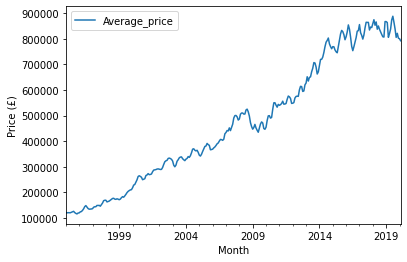

In [34]:
# Plot Camden prices since 1995
ax = camden.plot(x='Month', y='Average_price')
ax.set_ylabel('Price (£)')
plt.show()

In [22]:
# Add a year column
df['Year'] = df['Month'].apply(lambda m: m.year)
df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Borough,ID,Month,Average_price,Year
14476,Sutton,E09000029,2020-02-01,380197.6513,2020
14477,Tower Hamlets,E09000030,2020-02-01,462323.4758,2020
14478,Waltham Forest,E09000031,2020-02-01,441113.0235,2020
14479,Wandsworth,E09000032,2020-02-01,600088.5899,2020
14480,Westminster,E09000033,2020-02-01,975090.9590,2020


In [23]:
# Group by Borough and Year and then take the mean of the data points
dfg = df.groupby(by=['Borough', 'Year']).mean()
dfg.head()

Average_price
Borough            Year               
Barking & Dagenham 1995   51817.969390
                   1996   51718.192690
                   1997   55974.262309
                   1998   60285.821083
                   1999   65320.934441

In [24]:
# Inspect a sample
dfg.sample(10)

,,Average_price
Borough,Year,
Camden,2000,247114.633575
Barking & Dagenham,2009,156446.896358
Westminster,1996,139188.760342
Camden,2008,501223.236400
Southwark,2000,142266.729008
Enfield,2015,335503.499742
Merton,2017,512185.807217
Tower Hamlets,2011,287262.479150
Redbridge,2006,239729.767058


In [25]:
# Reset the index
dfg = dfg.reset_index()
dfg.head()

,Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


## 3. Modeling

Calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

In [0]:
# Define the model function
def create_price_ratio(d):
  '''Calculate a ratio of house prices, comparing 2018 with 1998'''
  avg_price_1998 = float(d['Average_price'][d['Year'] == 1998])
  avg_price_2018 = float(d['Average_price'][d['Year'] == 2018])
  price_ratio = avg_price_1998 / avg_price_2018
  return price_ratio


In [27]:
# Simple Test
create_price_ratio(dfg[dfg['Borough'] == 'Barking & Dagenham'])

0.20422256235393685

In [35]:
# Loop through all boroughs
boroughs = dfg['Borough'].unique()
price_ratios = {}

for borough in boroughs:
  borough_df = dfg[dfg['Borough'] == borough]
  price_ratios[borough] = create_price_ratio(borough_df)

print(price_ratios)

{'Barking & Dagenham': 0.20422256235393685, 'Barnet': 0.22945274120785797, 'Bexley': 0.2353507654063011, 'Brent': 0.2043086864360114, 'Bromley': 0.24421308489837312, 'Camden': 0.20261973503252542, 'City of London': 0.18862157770244367, 'Croydon': 0.23803288028014047, 'Ealing': 0.23194048191708755, 'Enfield': 0.23455064269011863, 'Greenwich': 0.20995010893854218, 'Hackney': 0.16133493530705734, 'Hammersmith & Fulham': 0.24167443054605853, 'Haringey': 0.19475619095546956, 'Harrow': 0.24635417785626296, 'Havering': 0.23120155787014757, 'Hillingdon': 0.23807975835429931, 'Hounslow': 0.25148317824115635, 'Islington': 0.20643891170300285, 'Kensington & Chelsea': 0.19675491852791563, 'Kingston upon Thames': 0.23416190234282552, 'Lambeth': 0.20170435486140822, 'Lewisham': 0.1835124676472171, 'Merton': 0.21091380604361798, 'Newham': 0.18848754146121072, 'Redbridge': 0.2236545053715767, 'Richmond upon Thames': 0.24967779731157863, 'Southwark': 0.18127484171283462, 'Sutton': 0.24280551426824518, 

In [36]:
# Convert to a dataframe
df_ratios = pd.DataFrame(list(price_ratios.items()))
df_ratios.head()

,0,1
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [37]:
# Rename columns
df_ratios.rename(columns={0: 'Borough', 1: '2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


In [38]:
# Get the Top 15
top_15 = df_ratios.sort_values(by='2018', ascending=False).head(15)
top_15

,Borough,2018
17,Hounslow,0.251483
26,Richmond upon Thames,0.249678
14,Harrow,0.246354
4,Bromley,0.244213
28,Sutton,0.242806
12,Hammersmith & Fulham,0.241674
16,Hillingdon,0.238080
7,Croydon,0.238033
2,Bexley,0.235351
9,Enfield,0.234551


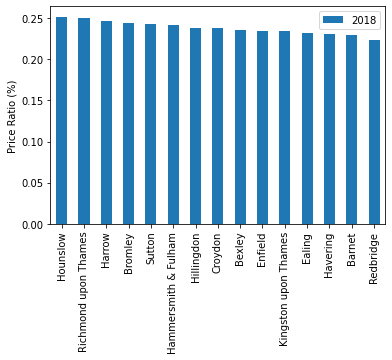

In [39]:
# Plot
ax = top_15.plot(kind='bar')
ax.set_xticklabels(top_15.Borough)
ax.set_ylabel('Price Ratio (%)')
plt.show()

## 4. Conclusion

**Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?**

Based on the ratio between the average housing prices between 2018 and 1998, the following London boroughs have seen the greatest price increase:

1. Hounslow
2. Richmond upon Thames
3. Harrow
4. Bromley
5. Sutton
6. Hammersmith & Fulham
7. Hillingdon
8. Croydon
9. Bexley
10. Enfield
11. Kingston upon Thames
12. Ealing
13. Havering
14. Barnet
15. Redbridge
